### ‎강신동‎ 님이 게시: IoT, Deep Learning, Smart Factory, Smart City (smartbean.org forum)
18시간
what is Monte-Carlo Simulation

a.k.a 개노가다 측정법

일단, 
몬테카를로는 도시 국가인 모나코의 
도시(마을?) 이름이며, 
인구는 3천명의 도박 도시입니다.
도박 도시라서 확률과 관련이..

첨부한 그림을 봅시다.

넓이의 비율에 대한 것입니다.

세로 길이가 1, 가로 길이가 2인 
전체 면적이 2인 직사각형입니다.

윗선의 과 아래선의 중앙을 선으로 잇습니다. 
그러면, 왼쪽 면적과 오른쪽 면적의 
비율은 얼마일까요?

직사각형 면적을 구하는 공식이 가로 x 세로 이므로 
왼쪽 면적이 1, 오른쪽 면적이 1 입니다. 
비율은 1/1 = 1 입니다.

-----
이제, 아래쪽 그림을 봅시다. 
윗선의 중앙과 아랫선의 중앙을 선으로 잇는데, 
직선이 아니라 구불구불하게 균형있게 이었습니다.

자, 이제 왼쪽의 면적과 오른쪽 면적의 
비율은 무엇일까요?

왼쪽과 오른쪽의 면적을 알아내는 수학 공식이 
무엇일까요?

손으로 구불구불하게 그린 중앙선 때문에 
면적을 구하는 공식은 없습니다.

쉬울 것 같았던 면적의 비율을 구할 수 없게 되었네요.

이때, 
사용하는 방식이 몬테카를로 방식입니다.

무작위로 면적에 점을 찍은 후 
그 점이 어느 면적에 있는지는 알 수 있습니다.

왼쪽 면에 속한 점의 갯수와 
오른쪽 면에 속한 점의 갯수를 실제로 세어서 
갯수를 비교하면, 면적의 비율과 거의 같을 것입니다.

점을 10개만 찍으면 무작위로 인하여 한쪽으로 
치우쳐서 오차가 좀 클 수가 있지만, 
점을 천만개를 찍어서 갯수를 세면 
오차는 매우 작아집니다.

천만개의 점을 누가 찍고 그걸 무식하게 세느냐의 
문제가 남는데요.

'소는 누가키우나' 의 개고생은 
컴퓨터에게 시키면 되는 시대입니다.

이러한 방식은 
환경에 대한 
수식을 모르는 문제에 적용하거나, 
완벽한 수식을 알더라도 그 해를 구할 수 없거나, 
완전한 운영 방식을 알더라도 너무 많은 경우의 수가 있거나 
할 때 사용합니다.

AlphaGo 내부에서 
강화학습 (RL, Reinforcement Learning)에 사용됩니다.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1미터 * 2미터 : cm 단위로 scaling
height = 100
width = 200
area = np.zeros([height, width])

#print(np.shape(area))
#print(area)

area_line = width // 2
for i in range(height):
    area_line = area_line + np.random.randint(low=-1, high=2)
    area_line = min(max(0, area_line), width-1)
    #print(i, area_line)
    area[i, area_line] = 1
    #print(np.argmax(area[i]))
#print(area)

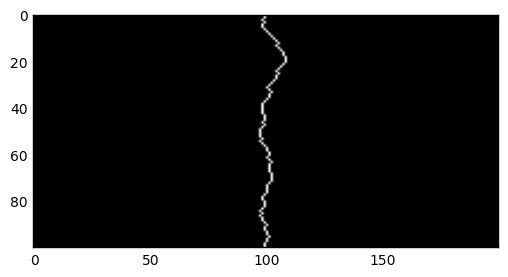

In [3]:
imgplot = plt.imshow(area, cmap='gray')
plt.show(imgplot)

In [4]:
area_left = 0
area_right = 0
area_sampling_count = height * width * 100    # 면적보다 몇배 더 샘플링할 것인가?
for i in range(area_sampling_count):
    sampling_height = np.random.randint(low=0, high=height)
    sampling_width = np.random.randint(low=0, high=width)
    #print(np.argmax(area[sampling_height]), sampling_height, sampling_width)
    if (np.argmax(area[sampling_height]) > sampling_width):
        area_left = area_left + 1
    else:
        area_right = area_right + 1
    #print(i, "area_left : ", area_left, "area_right : ", area_right)
    

In [5]:
print(area_sampling_count, "sampling in left : ", area_left, "sampling in right : ", area_right)
print(area_sampling_count, area_left/area_sampling_count, area_right/area_sampling_count)    

2000000 sampling in left :  1005054 sampling in right :  994946
2000000 0.502527 0.497473


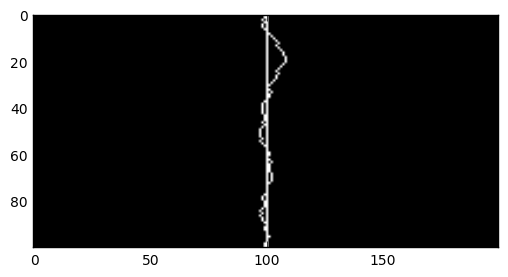

In [6]:
# 구별을 도와주기 위해, 중간선을 추가해주자
area_line = width // 2
area[:, area_line] = 1

imgplot = plt.imshow(area, cmap='gray')
plt.show(imgplot)